In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import utils
import answer_extraction
import seaborn as sns
import os
import json

## Quantitative Results

In [3]:
evalsum_df = pd.read_csv('results/test_accuracy_summary.csv')
evalsum_df

,problem_type,problem_num,gpt4turbo_0shot,gpt4turbo_1shot,gpt4turbo_5shot,gpt3.5turbo_0shot,gpt3.5turbo_1shot,gpt3.5turbo_5shot,llama3_0shot,llama3_5shot,codellama_0shot,codellama_5shot
0,overall,437,13.40,37.6,46.3,4.54,14.80,25.6,3.98,21.1,3.13,10.30
1,nondimensionalization,200,6.04,36.5,48.6,5.05,6.11,24.3,0.50,17.9,0.00,8.41
2,root_finding,63,32.10,50.4,58.1,17.20,28.90,29.3,11.30,17.5,8.00,13.10
3,ode,54,15.70,20.3,34.7,7.41,22.60,32.1,11.60,21.9,14.10,15.30
4,integral,120,14.90,40.5,41.4,3.33,18.20,23.1,2.52,28.1,0.50,9.57


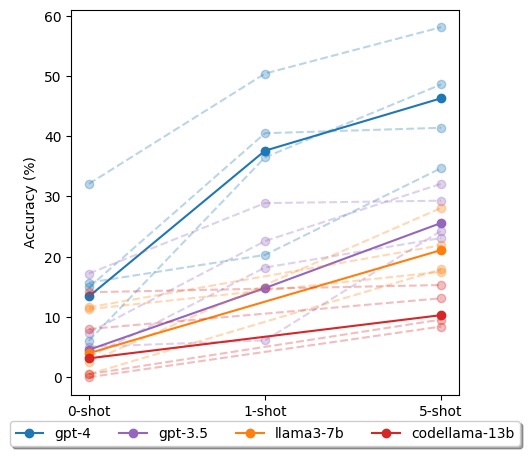

In [4]:
# by model
fig, ax  = plt.subplots(figsize=(5,5))
ax.plot(np.arange(3),evalsum_df.iloc[0,2:5],color = 'tab:blue',marker='o',label ='gpt-4')
for i in range(1,5):
    ax.plot(np.arange(3),evalsum_df.iloc[i,2:5],'--',color = 'tab:blue',marker='o',alpha=0.3)
ax.plot(np.arange(3),evalsum_df.iloc[0,5:8],color = 'tab:purple',marker='o',label ='gpt-3.5')
for i in range(1,5):
    ax.plot(np.arange(3),evalsum_df.iloc[i,5:8],'--',color = 'tab:purple',marker='o',alpha=0.3)
ax.plot([0,2],evalsum_df.iloc[0,8:10],color = 'tab:orange',marker='o',label ='llama3-7b')
for i in range(1,5):
    ax.plot([0,2],evalsum_df.iloc[i,8:10],'--',color = 'tab:orange',marker='o',alpha=0.3)
ax.plot([0,2],evalsum_df.iloc[0,10:12],color = 'tab:red',marker='o',label ='codellama-13b')
for i in range(1,5):
    ax.plot([0,2],evalsum_df.iloc[i,10:12],'--',color = 'tab:red',marker='o',alpha=0.3)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['0-shot','1-shot','5-shot'])
ax.set_ylabel('Accuracy (%)')
#ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

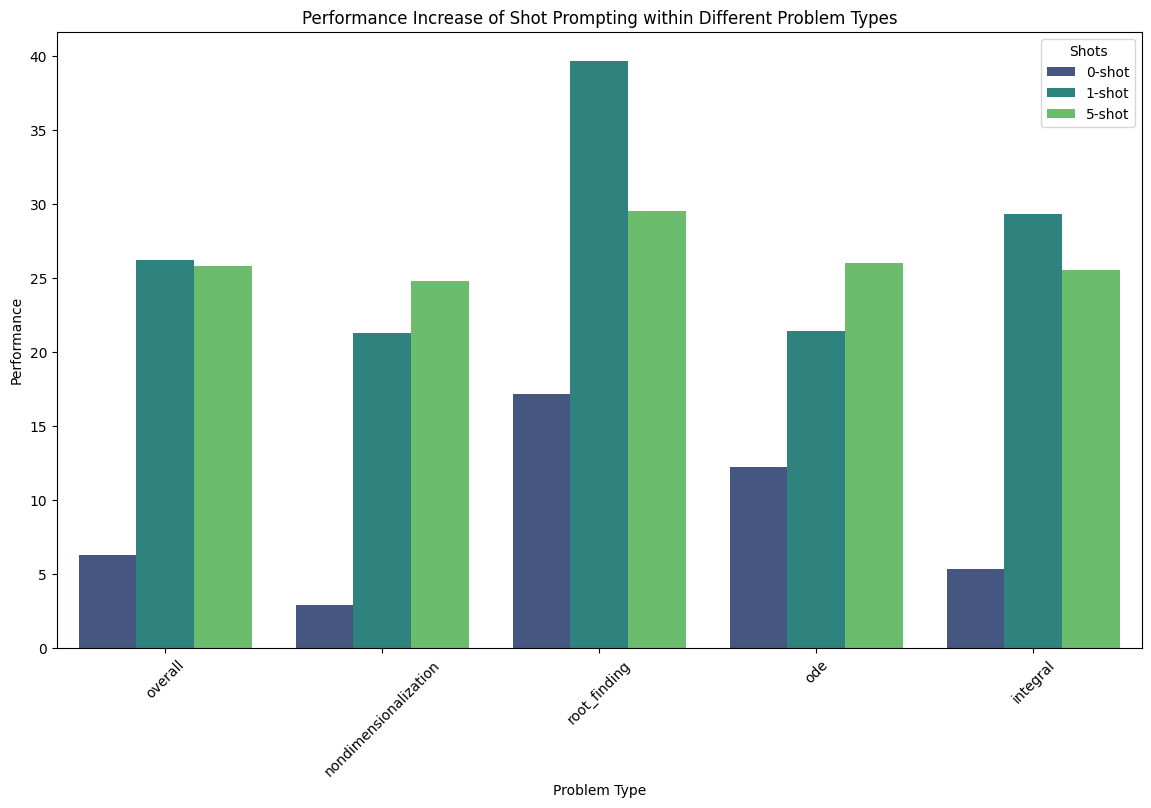

In [5]:
# Melting the DataFrame to a long format for easier plotting
df_melted = evalsum_df.melt(id_vars=['problem_type', 'problem_num'], var_name='model_shot', value_name='performance')

# Splitting the 'model_shot' into 'model' and 'shot'
df_melted[['model', 'shot']] = df_melted['model_shot'].str.split('_', expand=True)
df_melted['shot'] = df_melted['shot'].replace({'0shot': '0-shot', '1shot': '1-shot', '5shot': '5-shot'})

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='problem_type', y='performance', hue='shot', palette='viridis', errorbar=None)
plt.title('Performance Increase of Shot Prompting within Different Problem Types')
plt.xlabel('Problem Type')
plt.ylabel('Performance')
plt.legend(title='Shots')
plt.xticks(rotation=45)
plt.show()

In [6]:
df_melted

,problem_type,problem_num,model_shot,performance,model,shot
0,overall,437,gpt4turbo_0shot,13.40,gpt4turbo,0-shot
1,nondimensionalization,200,gpt4turbo_0shot,6.04,gpt4turbo,0-shot
2,root_finding,63,gpt4turbo_0shot,32.10,gpt4turbo,0-shot
3,ode,54,gpt4turbo_0shot,15.70,gpt4turbo,0-shot
4,integral,120,gpt4turbo_0shot,14.90,gpt4turbo,0-shot
5,overall,437,gpt4turbo_1shot,37.60,gpt4turbo,1-shot
6,nondimensionalization,200,gpt4turbo_1shot,36.50,gpt4turbo,1-shot
7,root_finding,63,gpt4turbo_1shot,50.40,gpt4turbo,1-shot
8,ode,54,gpt4turbo_1shot,20.30,gpt4turbo,1-shot
9,integral,120,gpt4turbo_1shot,40.50,gpt4turbo,1-shot


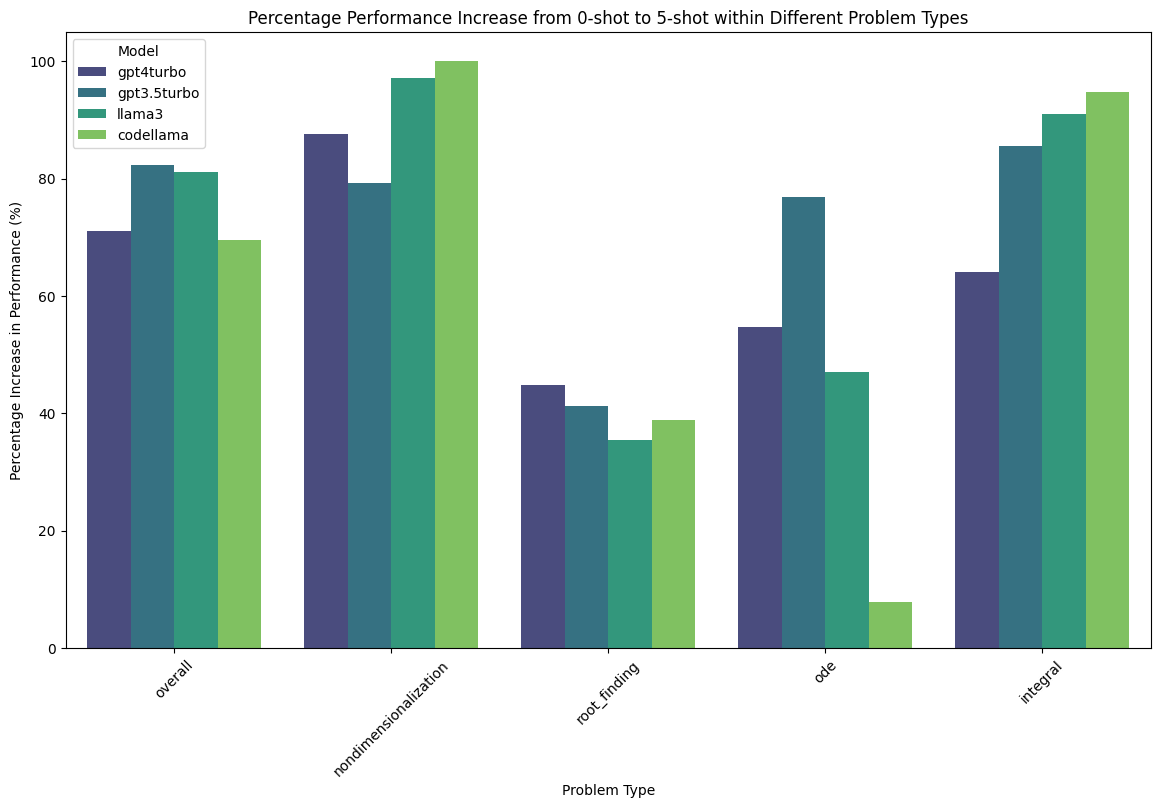

In [7]:
# Calculating the percentage increase from the 0-shot baseline to the 5-shot
for model in ['gpt4turbo', 'gpt3.5turbo', 'llama3', 'codellama']:
    evalsum_df[f'{model}_5shot_increase'] = (evalsum_df[f'{model}_5shot'] - evalsum_df[f'{model}_0shot']) / evalsum_df[f'{model}_5shot'] * 100

# Melting the DataFrame to a long format for easier plotting
df_melted = evalsum_df.melt(id_vars=['problem_type', 'problem_num'], value_vars=[
    'gpt4turbo_5shot_increase',
    'gpt3.5turbo_5shot_increase',
    'llama3_5shot_increase',
    'codellama_5shot_increase'
], var_name='model', value_name='percentage_increase')

# Splitting the 'model' column to just have model names
df_melted['model'] = df_melted['model'].str.replace('_5shot_increase', '')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='problem_type', y='percentage_increase', hue='model', palette='viridis', errorbar=None)
plt.title('Percentage Performance Increase from 0-shot to 5-shot within Different Problem Types')
plt.xlabel('Problem Type')
plt.ylabel('Percentage Increase in Performance (%)')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

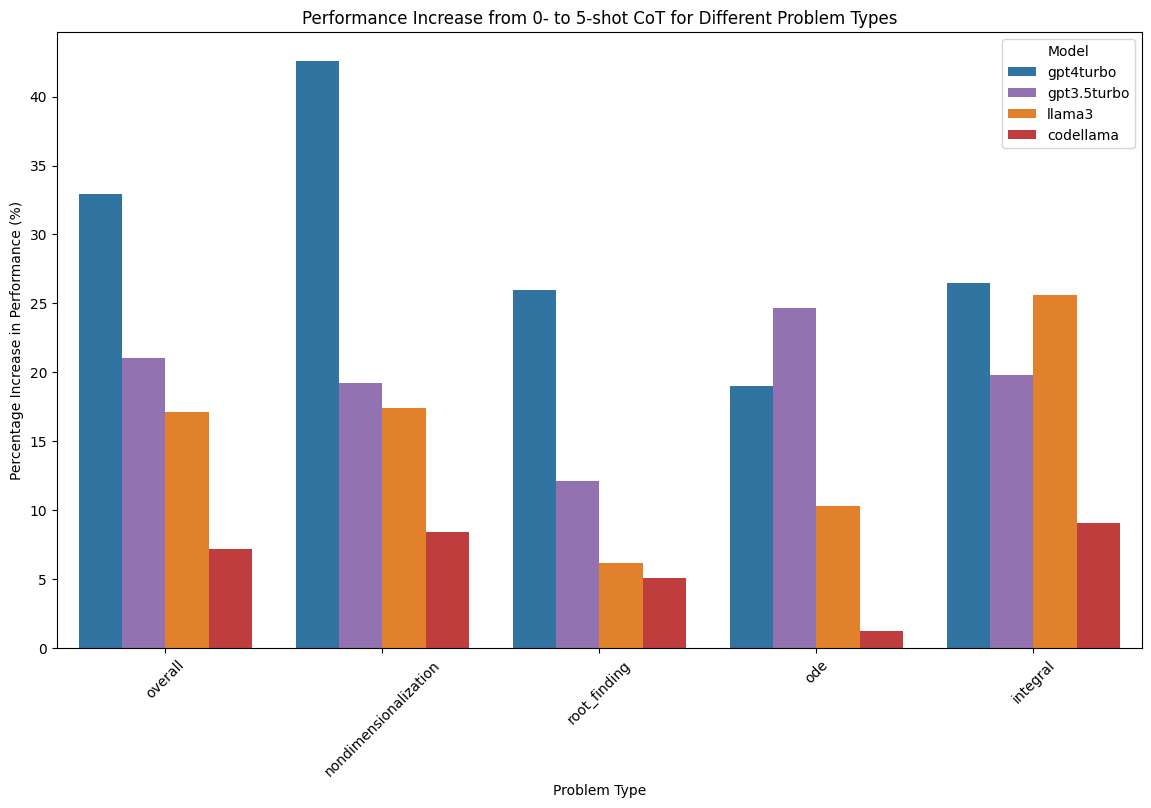

In [8]:
# Calculating the percentage increase from the 0-shot baseline to the 5-shot
for model in ['gpt4turbo', 'gpt3.5turbo', 'llama3', 'codellama']:
    evalsum_df[f'{model}_5shot_increase'] = (evalsum_df[f'{model}_5shot'] - evalsum_df[f'{model}_0shot'])

# Melting the DataFrame to a long format for easier plotting
df_melted = evalsum_df.melt(id_vars=['problem_type', 'problem_num'], value_vars=[
    'gpt4turbo_5shot_increase',
    'gpt3.5turbo_5shot_increase',
    'llama3_5shot_increase',
    'codellama_5shot_increase'
], var_name='model', value_name='percentage_increase')

# Splitting the 'model' column to just have model names
df_melted['model'] = df_melted['model'].str.replace('_5shot_increase', '')

# Plotting
custom_palette = ['tab:blue', 'tab:purple', 'tab:orange','tab:red']
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='problem_type', y='percentage_increase', hue='model', palette= custom_palette, errorbar=None)
plt.title('Performance Increase from 0- to 5-shot CoT for Different Problem Types')
plt.xlabel('Problem Type')
plt.ylabel('Percentage Increase in Performance (%)')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# TODO: add comparison line with the CoT paper 

In [9]:
evalsum_df

,problem_type,problem_num,gpt4turbo_0shot,gpt4turbo_1shot,gpt4turbo_5shot,gpt3.5turbo_0shot,gpt3.5turbo_1shot,gpt3.5turbo_5shot,llama3_0shot,llama3_5shot,codellama_0shot,codellama_5shot,gpt4turbo_5shot_increase,gpt3.5turbo_5shot_increase,llama3_5shot_increase,codellama_5shot_increase
0,overall,437,13.40,37.6,46.3,4.54,14.80,25.6,3.98,21.1,3.13,10.30,32.90,21.06,17.12,7.17
1,nondimensionalization,200,6.04,36.5,48.6,5.05,6.11,24.3,0.50,17.9,0.00,8.41,42.56,19.25,17.40,8.41
2,root_finding,63,32.10,50.4,58.1,17.20,28.90,29.3,11.30,17.5,8.00,13.10,26.00,12.10,6.20,5.10
3,ode,54,15.70,20.3,34.7,7.41,22.60,32.1,11.60,21.9,14.10,15.30,19.00,24.69,10.30,1.20
4,integral,120,14.90,40.5,41.4,3.33,18.20,23.1,2.52,28.1,0.50,9.57,26.50,19.77,25.58,9.07


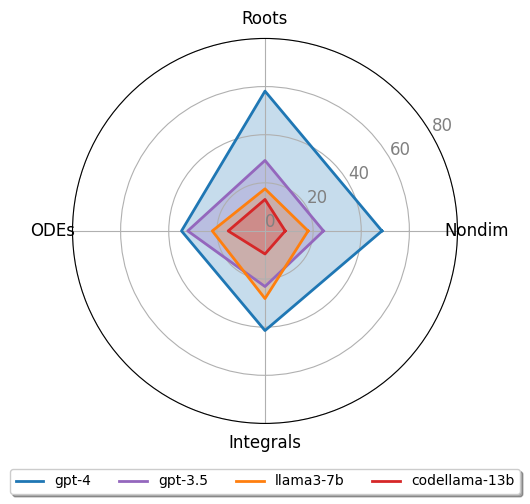

In [22]:

# Data
categories = ['Nondim','Roots','ODEs','Integrals']
num_vars = len(categories)

# Data values for each model
values = ['tab:blue', 
    list(evalsum_df.iloc[1:5,4]),  # GPT-4
    list(evalsum_df.iloc[1:5,7]),  # Model 2
    list(evalsum_df.iloc[1:5,9]),   # Model 3
    list(evalsum_df.iloc[1:5,11])  # Model 4
]

# Repeat the first value to close the circular graph
values = [v + [v[0]] for v in values]

# Compute angle for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories, color='black', size=12)


# Draw ylabels
ax.set_rlabel_position(30)
plt.yticks([0, 20, 40,60,80], ['0','20','40','60','80'], color="grey", size=12)
plt.ylim(0, 80)

# Plot data
colors = ['tab:blue', 'tab:purple', 'tab:orange', 'tab:red']
names = ['gpt-4', 'gpt-3.5', 'llama3-7b', 'codellama-13b']
for i in range(len(values)):
    ax.plot(angles, values[i], linewidth=2, linestyle='solid', color=colors[i],label=names[i])
    ax.fill(angles, values[i], color=colors[i], alpha=0.25)

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.show()


## Qualitative Analysis

#### Score breakdown 

In [249]:
def calculate_accuracy_breakdown(question_types, json_name):
    accuracy_breakdown = []
    
    for question_type in question_types:
        json_path = f'results/responses/{question_type}/{question_type}_{json_name}.json'
        
        if os.path.exists(json_path):
            problem_response = utils.read_json(json_path)
            accuracy_breakdown.append(answer_extraction.categorize_scores(problem_response))
        else:
            accuracy_breakdown.append([0, 0, 0])  # Assuming there are 3 categories: incorrect, partial, correct
    
    accuracy_breakdown = np.array(accuracy_breakdown)
    
    nondim = np.sum(accuracy_breakdown[:2], axis=0)
    integral = np.sum(accuracy_breakdown[-2:], axis=0)
    
    accuracy_breakdown_new = np.vstack((nondim, accuracy_breakdown[2:-2], integral))
    
    return accuracy_breakdown_new

question_types = ['nondimensionalization_symbolic', 'nondimensionalization_numeric', 'polynomial_roots', 'ode', 'laplace_integral', 'traditional_integral']
json_name = '5shot_codellama'

accuracy_breakdown_new = calculate_accuracy_breakdown(question_types, json_name)

In [105]:
def calculate_percentages(accuracy_breakdown_new, categories):
    # Extract data
    incorrect = accuracy_breakdown_new[:, 0]
    partial = accuracy_breakdown_new[:, 1]
    correct = accuracy_breakdown_new[:, 2]
    
    # Calculate totals
    total = incorrect + partial + correct
    
    # Calculate percentages
    incorrect_percentage = (incorrect / total) * 100
    partial_percentage = (partial / total) * 100
    correct_percentage = (correct / total) * 100
    
    return incorrect_percentage, partial_percentage, correct_percentage
categories = ['Nondim','Roots', 'ODEs', 'Integrals']
incorrect_percentage, partial_percentage, correct_percentage = calculate_percentages(accuracy_breakdown_new, categories)

In [106]:
incorrect_percentage

array([75.66137566, 37.93103448, 34.69387755, 60.90909091])

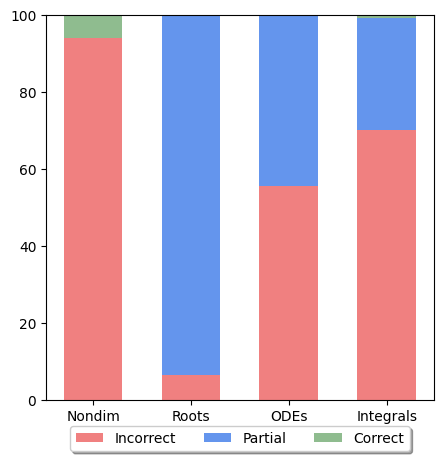

In [13]:
# Stacked bar plot
fig, ax = plt.subplots(figsize=(5, 5))

bar_width = 0.6
indices = np.arange(len(categories))

p1 = ax.bar(indices, incorrect_percentage, bar_width, label='Incorrect',color='lightcoral')
p2 = ax.bar(indices, partial_percentage, bar_width, bottom=incorrect_percentage, label='Partial',color = 'cornflowerblue')
p3 = ax.bar(indices, correct_percentage, bar_width, bottom=incorrect_percentage + partial_percentage, label='Correct',color='darkseagreen')

#ax.set_xlabel('Problem Types')
#ax.set_ylabel('Percentage')
#ax.set_title('Stacked Bar Plot of Problem Types')
ax.set_xticks(indices)
ax.set_xticklabels(categories)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylim([0,100])
# Show the plot
plt.show()


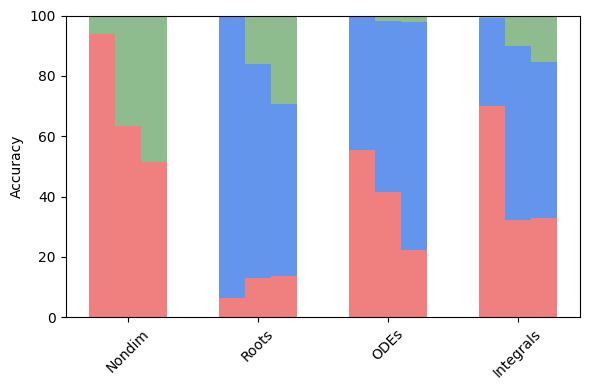

In [14]:
def load_plot_grouped_bar_chart(question_types,categories, models, shot_types):
    x = np.arange(len(categories))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(6, 4))
    
    for i, model in enumerate(models):
        for j, shot_type in enumerate(shot_types):
            json_name = shot_type +'_'+ model
            accuracy_breakdown_new = calculate_accuracy_breakdown(question_types, json_name)
            if not np.any(accuracy_breakdown_new):
                continue
            incorrect_percentage, partial_percentage, correct_percentage = calculate_percentages(accuracy_breakdown_new, categories)
            offset = (i * len(shot_types) + j) * width - (len(models) * len(shot_types) * width) / 2 + width / 2
            #print(correct_percentage)
            ax.bar(x + offset, incorrect_percentage, width, label=f'{model} - {shot_type} - Incorrect', color='lightcoral')
            ax.bar(x + offset, partial_percentage, width, bottom=incorrect_percentage, label=f'{model} - {shot_type} - Partial', color='cornflowerblue')
            ax.bar(x + offset, correct_percentage, width, bottom=incorrect_percentage + partial_percentage, label=f'{model} - {shot_type} - Correct', color='darkseagreen')


    #ax.set_xlabel('Problem Subtypes')
    ax.set_ylabel('Accuracy')
    #ax.set_title('Correctness Percentage by Model and Shot Type')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    #ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming correct_percentage is a 3D array of shape (num_models, num_shot_types, num_categories)
question_types = ['nondimensionalization_symbolic', 'nondimensionalization_numeric', 'polynomial_roots', 'ode', 'laplace_integral', 'traditional_integral']
#models = ['gpt4', 'gpt3.5', 'llama3', 'codellama']
models = ['gpt4']
shot_types = ['0shot', '1shot', '5shot']
#shot_types = ['0shot', '5shot']
categories = ['Nondim', 'Roots', 'ODEs', 'Integrals']

# Example usage
load_plot_grouped_bar_chart(question_types, categories, models, shot_types)


#### Examine error reasons

In [270]:
def get_problem_numbers_with_zero_score(question_type,json_name,score):
    json_path = f'results/responses/{question_type}/{question_type}_{json_name}.json'
    with open(json_path, 'r') as file:
        data = json.load(file)
    
    selected_problems = [problem_number for problem_number, details in data.items() if details.get('score') == score]
    
    return data, selected_problems

# Example usage
question_type = 'polynomial_roots'
data, problem_num = get_problem_numbers_with_zero_score(question_type,json_name,1)
print(problem_num)


['215']


In [282]:
response = data['218']['grade_response']
latex_response = response.replace(r'\[', ' $').replace(r'\]', '$ ').replace(r'\(', ' $').replace(r'\)', ' $').replace('$\\', ' $').replace('$','$ ')
utils.display_content(latex_response)

<IPython.core.display.Latex object>

"Let's extract and compare the analytical expressions for the roots in the limit of large and small epsilon from both the response and the ground truth solution.\n\n### Response:\n- **Large positive epsilon:**\n   $ \n  x = \\pm \\sqrt[3]{\\frac{1}{\\epsilon}} (\\cos(\\frac{\\pi}{9}) + i \\sin(\\frac{\\pi}{9}))\n  $  \n  \n- **Small positive epsilon:**\n   $ \n  x = \\pm \\sqrt[3]{\\frac{1}{\\epsilon}} (\\cos(-\\frac{\\pi}{9}) + i \\sin(-\\frac{\\pi}{9}))\n  $  \n\n### Ground Truth Solution:\n- **Large positive epsilon:**\n   $ \n  x = \\left[ - \\sqrt[8]{- \\frac{1}{\\epsilon}}, \\  \\sqrt[8]{- \\frac{1}{\\epsilon}}, \\  - i \\sqrt[8]{- \\frac{1}{\\epsilon}}, \\  i \\sqrt[8]{- \\frac{1}{\\epsilon}}, \\  \\frac{\\sqrt{2} \\sqrt[8]{- \\frac{1}{\\epsilon}} \\left(-1 - i\\right)}{2}, \\  \\frac{\\sqrt{2} \\sqrt[8]{- \\frac{1}{\\epsilon}} \\left(-1 + i\\right)}{2}, \\  \\frac{\\sqrt{2} \\sqrt[8]{- \\frac{1}{\\epsilon}} \\left(1 - i\\right)}{2}, \\  \\frac{\\sqrt{2} \\sqrt[8]{- \\frac{1}{\\

In [208]:
incorrect = accuracy_breakdown_new[:, 0]
partial = accuracy_breakdown_new[:, 1]
correct = accuracy_breakdown_new[:, 2]

In [256]:
# breakdown analysis for roots type
incorrect_roots = incorrect[1]
partial_roots = partial[1]
correct_roots = correct[1]
inner_sizes = [correct_roots, partial_roots-1, incorrect_roots]
norm_inner_sizes = inner_sizes / np.sum(inner_sizes)*2*np.pi
plot_inner = np.cumsum(np.append(0,norm_inner_sizes.flatten()[:-1]))
# number 23, 5, 4 acquired by human examination of answers
#outer_sizes = [correct_roots, 23, 5, 4, incorrect_roots]
outer_sizes = [correct_roots, 6, 32, 8]
norm_outer_sizes = outer_sizes / np.sum(outer_sizes)*2*np.pi
plot_outer = np.cumsum(np.append(0,norm_outer_sizes.flatten()[:-1]))

In [258]:
outer_sizes

[17, 6, 32, 8]

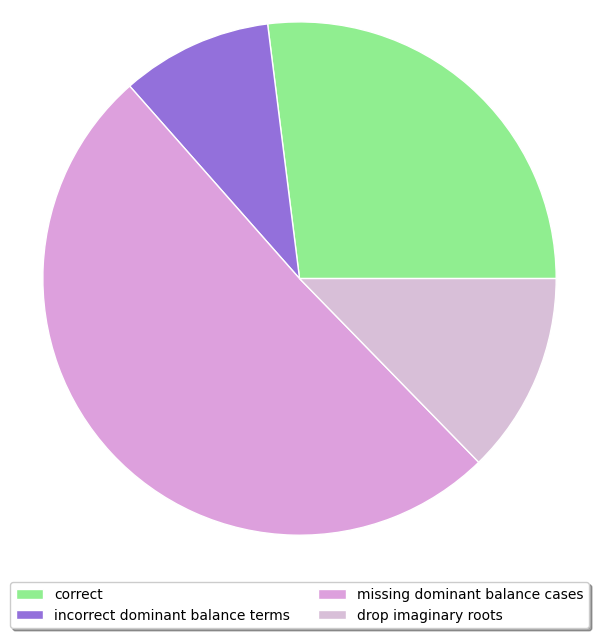

In [259]:
# Creating dataset
size = 6


# Creating color scale
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
							10, 12, 13, 15,
							17, 18, 20]))

# Creating plot
fig, ax = plt.subplots(figsize=(7, 7),
					subplot_kw=dict(polar=True))

bars = ax.bar(x=plot_outer,
	width=norm_outer_sizes,
	bottom=1-size,
	height=size,
	color=['lightgreen','mediumpurple','plum','thistle'],
	edgecolor='w',
	linewidth=1,
	align="edge")

# Adding a legend
labels = ['correct','incorrect dominant balance terms','missing dominant balance cases','drop imaginary roots']
for bar, label in zip(bars, labels):
    bar.set_label(label)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
'''ax.bar(x=plot_inner,
	width=norm_inner_sizes,
	bottom=1-2*size,
	height=size,
	color=['darkseagreen','cornflowerblue','lightcoral'],
	edgecolor='w',
	linewidth=1,
	align="edge")'''


#ax.set(title="Detailed Error Types")
ax.set_axis_off()

# show plot
plt.show()
